In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pip-install-lifelines/fonttools-4.55.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/tzdata-2024.2-py2.py3-none-any.whl
/kaggle/input/pip-install-lifelines/kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
/kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pillow-11.0.0-cp310-cp310-manylinux_2_28_x86_64.whl
/kaggle/input/pip-install-lifelines/contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pyparsing-3.2.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/wrapt-1.17.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/__results__.html
/kaggle/input/pip-install-lifelines/cycler-0.12.1-py3-n

In [2]:
import matplotlib.pyplot as plt


In [3]:
# !pip install /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
# !pip install /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
# !pip install /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
# !pip install /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
# !pip install /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl


In [4]:
# !pip download lifelines

In [5]:
from metric import score

/kaggle/input/pip-install-lifelines/fonttools-4.55.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/tzdata-2024.2-py2.py3-none-any.whl
/kaggle/input/pip-install-lifelines/kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
/kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pillow-11.0.0-cp310-cp310-manylinux_2_28_x86_64.whl
/kaggle/input/pip-install-lifelines/contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/pyparsing-3.2.0-py3-none-any.whl
/kaggle/input/pip-install-lifelines/wrapt-1.17.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pip-install-lifelines/__results__.html
/kaggle/input/pip-install-lifelines/cycler-0.12.1-py3-n

In [6]:
train = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')
test = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')

# F# E# 

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
RMV = ["ID","efs","efs_time"]
FEATURES = [c for c in train.columns if not c in RMV]
print(f"В обучающих данных {len(FEATURES)} фичей: {FEATURES}")

В обучающих данных 57 фичей: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [9]:
#filling hla_nmdp_6
train["hla_nmdp_6"].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_high"]].sum(axis=1), inplace=True)
test["hla_nmdp_6"].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_high"]].sum(axis=1), inplace=True)  

#filling hla_low_res_6
train["hla_low_res_6"].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)
test["hla_low_res_6"].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)  

#filling hla_high_res_6
train["hla_high_res_6"].fillna(train[["hla_match_a_high", "hla_match_b_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)
test["hla_high_res_6"].fillna(test[["hla_match_a_high", "hla_match_b_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)  

#filling hla_low_res_8
train['hla_low_res_8'].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)
test['hla_low_res_8'].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low"]].sum(axis=1), inplace=True)

#filling hla_high_res_8
train["hla_high_res_8"].fillna(train[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)
test["hla_high_res_8"].fillna(test[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high"]].sum(axis=1), inplace=True)

#filling hla_low_res_10
train["hla_low_res_10"].fillna(train[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low", "hla_match_dqb1_low"]].sum(axis=1), inplace=True)
test["hla_low_res_10"].fillna(test[["hla_match_a_low", "hla_match_b_low", "hla_match_c_low", "hla_match_drb1_low", "hla_match_dqb1_low"]].sum(axis=1), inplace=True)

#filling hla_high_res_10
train["hla_high_res_10"].fillna(train[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high", "hla_match_dqb1_high"]].sum(axis=1), inplace=True)
test["hla_high_res_10"].fillna(test[["hla_match_a_high", "hla_match_b_high", "hla_match_c_high", "hla_match_drb1_high", "hla_match_dqb1_high"]].sum(axis=1), inplace=True)


In [10]:
CATS = []
for c in FEATURES:
    if train[c].dtype=="object":
        CATS.append(c)
        train[c] = train[c].fillna("NAN")
        test[c] = test[c].fillna("NAN")
    else:
        train[c] = train[c].fillna(-1)
        test[c] = test[c].fillna(-1) 
print(f" В общем в данных, {len(CATS)} КАТЕГОРИАЛЬНЫХ ФИЧЕЙ: {CATS}")

 В общем в данных, 35 КАТЕГОРИАЛЬНЫХ ФИЧЕЙ: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


In [11]:
combined = pd.concat([train,test],axis=0,ignore_index=True)
#print("Combined data shape:", combined.shape )

# LABEL ENCODE CATEGORICAL FEATURES
print("We LABEL ENCODE the CATEGORICAL FEATURES: ",end="")
for c in FEATURES:

    # LABEL ENCODE CATEGORICAL AND CONVERT TO INT32 CATEGORY
    if c in CATS:
        print(f"{c}, ",end="")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        combined[c] = combined[c].astype("int32")
        combined[c] = combined[c].astype("category")
    
train = combined.iloc[:len(train)].copy()
test = combined.iloc[len(train):].reset_index(drop=True).copy()

We LABEL ENCODE the CATEGORICAL FEATURES: dri_score, psych_disturb, cyto_score, diabetes, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, tce_imm_match, rituximab, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe, prior_tumor, peptic_ulcer, gvhd_proph, rheum_issue, sex_match, race_group, hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac, pulm_moderate, 

Kaplan Meier target¶

In [12]:
from lifelines import KaplanMeierFitter
def transform_survival_probability_kmf(df, time_col='efs_time', event_col='efs'):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_col], df[event_col])
    y = kmf.survival_function_at_times(df[time_col]).values
    return y
train["KaplanMeier"] = transform_survival_probability_kmf(train, time_col='efs_time', event_col='efs')

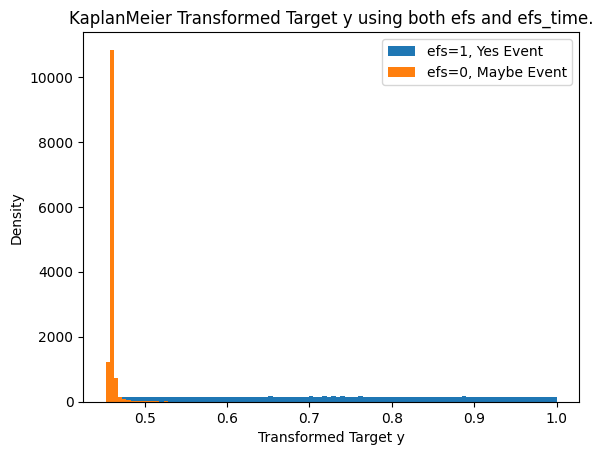

In [13]:
plt.hist(train.loc[train.efs==1,"KaplanMeier"],bins=100,label="efs=1, Yes Event")
plt.hist(train.loc[train.efs==0,"KaplanMeier"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("KaplanMeier Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

NelsonAalen target¶


In [14]:
from lifelines import NelsonAalenFitter
def transform_survival_probability_naf(df, time_col='efs_time', event_col='efs'):
    naf = NelsonAalenFitter()
    naf.fit(durations =df[time_col], event_observed=df[event_col])
    y = -naf.cumulative_hazard_at_times(df[time_col]).values
    return y
train["NelsonAalen"] = transform_survival_probability_naf(train, time_col='efs_time', event_col='efs')

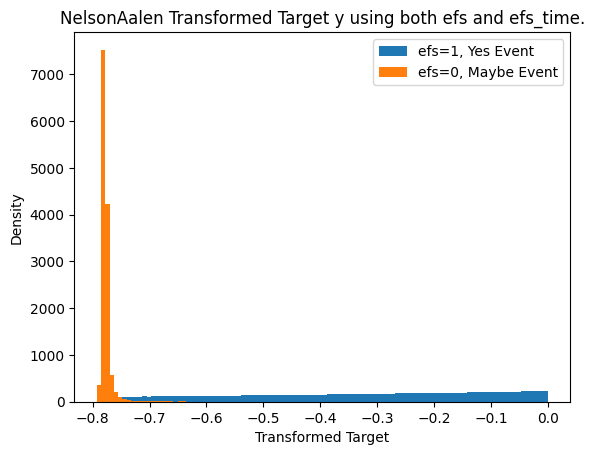

In [15]:
plt.hist(train.loc[train.efs==1,"NelsonAalen"],bins=100,label="efs=1, Yes Event")
plt.hist(train.loc[train.efs==0,"NelsonAalen"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Transformed Target")
plt.ylabel("Density")
plt.title("NelsonAalen Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

# COX target


In [16]:
from lifelines import CoxPHFitter
def transform_survival_probability_cox(df, time_col='efs_time', event_col='efs'):
    cph = CoxPHFitter()
    cph.fit(df=df, duration_col=time_col, event_col=event_col)
    y = []
    for a in train['efs_time']:
        y.append(cph.baseline_survival_.loc[a, :].item())
    return y
train["CoxPH"] = transform_survival_probability_cox(train, time_col='efs_time', event_col='efs')

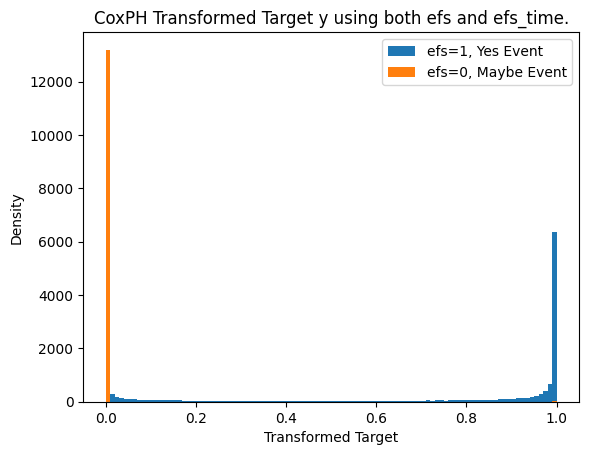

In [17]:
plt.hist(train.loc[train.efs==1,"CoxPH"],bins=100,label="efs=1, Yes Event")
plt.hist(train.loc[train.efs==0,"CoxPH"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Transformed Target")
plt.ylabel("Density")
plt.title("CoxPH Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

# Params

In [18]:
param_xgb = {
    'device': 'cpu',
    'enable_categorical': True, 
    "objective": "reg:squarederror",
    "n_estimators": 6000,
    "verbosity": 0,
    'learning_rate': 0.009,
    'max_depth': 4,
    'subsample': 0.91,
    'colsample_bytree': 0.24,
    'min_child_weight': 5,
    'reg_lambda': 13
}

param_cox = {
    'device': 'cpu',
    'enable_categorical': True, 
    "objective": "survival:cox",
    "n_estimators": 6000,
    "verbosity": 0,
    'learning_rate': 0.038,
    'max_depth': 4,
    'subsample': 0.84,
    'colsample_bytree': 0.27,
    'min_child_weight': 16,
    'reg_lambda': 15
}

param_lgb = {
        'n_estimators': 2100,
        'learning_rate': 0.013,
        'max_depth': 10,
        'subsample': 0.87,
        'colsample_bytree': 0.12,
        'min_data_in_leaf': 17,
        'device': 'cpu',
        'objective': "regression",
        'metric': "rmse",
        'verbosity': -1,
        'bagging_freq': 1,
}

# Evaluation func and num of Folds

In [19]:
# from metric import score
def res(df, preds):
    y_true = df[["ID","efs","efs_time","race_group"]].copy()
    y_pred = df[["ID"]].copy()
    y_pred["prediction"] = preds
    return score(y_true.copy(), y_pred.copy(), "ID")

In [20]:
from sklearn.model_selection import KFold
FOLDS = 5

In [21]:
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
print("Using XGBoost version",xgb.__version__)

Using XGBoost version 2.0.3


In [22]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
print("Using LightGBM version",lgb.__version__)

Using LightGBM version 4.5.0


# XGBoost KaplanMeier

In [23]:
%%time
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
oof_xgb_km = np.zeros(len(train))
pred_xgb_km = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"KaplanMeier"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"KaplanMeier"]
    X_test = test[FEATURES].copy()
    
    model_xgb_km = XGBRegressor(**param_xgb)
    model_xgb_km.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],  
        verbose=0,
        early_stopping_rounds=300,
    )

    # INFER OOF
    oof_xgb_km[test_index] = model_xgb_km.predict(X_val)
    # INFER TEST
    pred_xgb_km += model_xgb_km.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_km /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 11min 56s, sys: 2.83 s, total: 11min 59s
Wall time: 3min 4s


In [24]:
print('CV for XGBoost KaplanMeier', res(train, oof_xgb_km))


CV for XGBoost KaplanMeier 0.6743965106178352


# XGBoost NelsonAalen

In [25]:
%%time
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
oof_xgb_na = np.zeros(len(train))
pred_xgb_na = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"NelsonAalen"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"NelsonAalen"]
    X_test = test[FEATURES].copy()
    
    model_xgb_na = XGBRegressor(**param_xgb)
    
    model_xgb_na.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],  
        verbose=0,
        early_stopping_rounds=300,
    )

    # INFER OOF
    oof_xgb_na[test_index] = model_xgb_na.predict(X_val)
    # INFER TEST
    pred_xgb_na += model_xgb_na.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_na /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 12min 36s, sys: 3 s, total: 12min 39s
Wall time: 3min 14s


In [26]:
print('CV for XGBoost NelsonAalen', res(train, oof_xgb_na))


CV for XGBoost NelsonAalen 0.6769502021393393


# XGBoost CoxPH

In [27]:
%%time
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
oof_xgb_coxph = np.zeros(len(train))
pred_xgb_coxph = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxPH"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxPH"]
    X_test = test[FEATURES].copy()
    
    model_xgb_coxph = XGBRegressor(**param_xgb)
    
    model_xgb_coxph.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],  
        verbose=0,
        early_stopping_rounds=300,
    )

    # INFER OOF
    oof_xgb_coxph[test_index] = model_xgb_coxph.predict(X_val)
    # INFER TEST
    pred_xgb_coxph += model_xgb_coxph.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_coxph /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 12min 16s, sys: 2.91 s, total: 12min 19s
Wall time: 3min 9s


In [28]:
print('CV for XGBoost CoxPH', res(train, oof_xgb_coxph))


CV for XGBoost CoxPH 0.6739009259233353


# XGBoost with Cox loss

In [29]:
# SURVIVAL COX NEEDS THIS TARGET (TO DIGEST EFS AND EFS_TIME)
train["efs_time2"] = train.efs_time.copy()
train.loc[train.efs==0,"efs_time2"] *= -1

In [30]:
%%time
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
oof_xgb_cox = np.zeros(len(train))
pred_xgb_cox = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"efs_time2"]    
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"efs_time2"]
    X_test = test[FEATURES].copy()

    model_xgb_cox = XGBRegressor(**param_cox)
    
    model_xgb_cox.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0, early_stopping_rounds=300)
    
    # INFER OOF
    oof_xgb_cox[test_index] = model_xgb_cox.predict(X_val)
    # INFER TEST
    pred_xgb_cox += model_xgb_cox.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb_cox /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 2min 45s, sys: 575 ms, total: 2min 45s
Wall time: 42.4 s


In [31]:
print('CV for XGBoost Cox', res(train, oof_xgb_cox))


CV for XGBoost Cox 0.6708954235505629


# LightGBM KaplanMeier

In [32]:
%%time
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
oof_lgb_km = np.zeros(len(train))
pred_lgb_km = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"KaplanMeier"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"KaplanMeier"]
    X_test = test[FEATURES].copy()

    model_lgb_km = LGBMRegressor(**param_lgb)
    
    model_lgb_km.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
    )
    
    # INFER OOF
    oof_lgb_km[test_index] = model_lgb_km.predict(X_val)
    # INFER TEST
    pred_lgb_km += model_lgb_km.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_lgb_km /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 1min 43s, sys: 2.37 s, total: 1min 45s
Wall time: 53.1 s


In [33]:
print('CV for LightGBM KaplanMeier', res(train, oof_lgb_km))


CV for LightGBM KaplanMeier 0.673350135835183


# LightGBM NelsonAalen

In [34]:
%%time
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
oof_lgb_na = np.zeros(len(train))
pred_lgb_na = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"NelsonAalen"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"NelsonAalen"]
    X_test = test[FEATURES].copy()

    model_lgb_na = LGBMRegressor(**param_lgb)
    
    model_lgb_na.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
    )
    
    # INFER OOF
    oof_lgb_na[test_index] = model_lgb_na.predict(X_val)
    # INFER TEST
    pred_lgb_na += model_lgb_na.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_lgb_na /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################
CPU times: user 1min 39s, sys: 2.26 s, total: 1min 41s
Wall time: 51.2 s


In [35]:
print('CV for LightGBM NelsonAalen', res(train, oof_lgb_na))


CV for LightGBM NelsonAalen 0.675264571123041


# LightGBM CoxPH

In [36]:
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
oof_lgb_coxph = np.zeros(len(train))
pred_lgb_coxph = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    X_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"CoxPH"]
    X_val = train.loc[test_index,FEATURES].copy()
    y_val = train.loc[test_index,"CoxPH"]
    X_test = test[FEATURES].copy()

    model_lgb_coxph = LGBMRegressor(**param_lgb)
    
    model_lgb_coxph.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
    )
    
    # INFER OOF
    oof_lgb_coxph[test_index] = model_lgb_coxph.predict(X_val)
    # INFER TEST
    pred_lgb_coxph += model_lgb_coxph.predict(X_test)

# COMPUTE AVERAGE TEST PREDS
pred_lgb_coxph /= FOLDS

#########################
### Fold 1
#########################
#########################
### Fold 2
#########################
#########################
### Fold 3
#########################
#########################
### Fold 4
#########################
#########################
### Fold 5
#########################


In [37]:
print('CV for LightGBM CoxPH', res(train, oof_lgb_coxph))


CV for LightGBM CoxPH 0.6734052448891039


# Resulting CV scores

In [38]:
print(10 * '#')
print('RESULTS')
print(10 * '#')
print('CV for XGBoost KaplanMeier ', res(train, oof_xgb_km))
print('CV for XGBoost NelsonAalen ', res(train, oof_xgb_na))
print('CV for XGBoost CoxPH       ', res(train, oof_xgb_coxph))
print('CV for XGBoost Cox Loss    ', res(train, oof_xgb_cox))
print(10 * '#')
print('CV for LightGBM KaplanMeier', res(train, oof_lgb_km))
print('CV for LightGBM NelsonAalen', res(train, oof_lgb_na))
print('CV for LightGBM CoxPH      ', res(train, oof_lgb_coxph))

##########
RESULTS
##########
CV for XGBoost KaplanMeier  0.6743965106178352
CV for XGBoost NelsonAalen  0.6769502021393393
CV for XGBoost CoxPH        0.6739009259233353
CV for XGBoost Cox Loss     0.6708954235505629
##########
CV for LightGBM KaplanMeier 0.673350135835183
CV for LightGBM NelsonAalen 0.675264571123041
CV for LightGBM CoxPH       0.6734052448891039


# Making submission

In [39]:
from scipy.stats import rankdata

oof_models = [
    rankdata(oof_xgb_km),
    rankdata(oof_xgb_na),
    rankdata(oof_xgb_coxph),
    rankdata(oof_xgb_cox),
    rankdata(oof_lgb_km),
    rankdata(oof_lgb_na),
    rankdata(oof_lgb_coxph)
]

pred_models = [
    rankdata(pred_xgb_km),
    rankdata(pred_xgb_na),
    rankdata(pred_xgb_coxph),
    rankdata(pred_xgb_cox),
    rankdata(pred_lgb_km),
    rankdata(pred_lgb_na),
    rankdata(pred_lgb_coxph)
]

In [40]:
coefs = [3, 2, 5, 10, 1, 1, 2]
oof = 0
for coef, model in zip(coefs, oof_models):
        oof += coef * model
print('Overall CV', res(train , oof))

Overall CV 0.6793586134484725


In [41]:
ids = test['ID']
preds = 0    
for coef, model in zip(coefs, pred_models):
        preds += coef * model

output = pd.DataFrame(data={'ID': ids, 'prediction': preds})
output.to_csv('submission.csv', index=False)